# ML for Econ Analysis Project 1 - Peru
name here
## 1 Problem Description
blablablabla


In [ ]:
#!pip install scikit-neuralnetwork

In [ ]:
#!pip install lightgbm

In [ ]:
#! pip install mlxtend

In [41]:
# Import everything
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import normal as rnorm
import itertools
import time
import statsmodels.api as sm

# for plot
import seaborn as sns
#stata-like output
import statsmodels.api as sm
import statsmodels.formula.api as smf

#for missing values
import missingno as msno
from sklearn.impute import SimpleImputer

In [42]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network
 
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [43]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# 2 Data Preprocessing
to check the missing value of data, visulize the data to get a "feel", and normalize the data

## 2.1 Dataset acquisition
we use pd.read_csv to read the csv file as dataframe data type.

In [44]:
# Peru data
peru = pd.read_csv('datasets/peru_matlab_export_full.csv')
peru.head()
# Overview of all variables
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   46305 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

## 2.2 Cleaning the Data
We check our dataset by detecting whether it contains null, Nan values or missing values.

In [45]:
peru.isnull().sum()

lnpercapitaconsumption      0
d_fuel_other                0
d_fuel_wood                 0
d_fuel_coal                 0
d_fuel_kerosene             0
                         ... 
h_hhsize                    0
id_for_matlab               0
hhid                        0
lncaphat_OLS              927
percapitahat_OLS          927
Length: 81, dtype: int64

In [46]:
columnNames = peru.columns.values.tolist()
columnNames[2]

'd_fuel_wood'

In [47]:
peru.loc[25:26,columnNames[22:30]]

,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

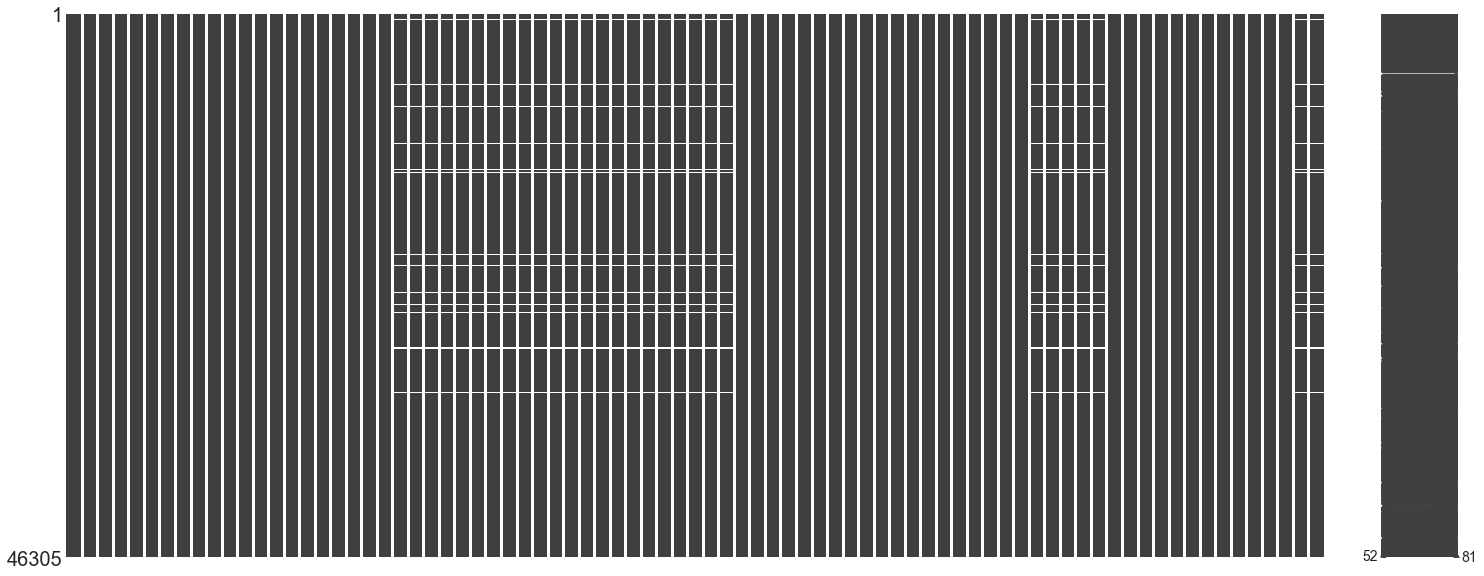

In [28]:
# Visualize no missing values
msno.matrix(peru)

In [48]:
# Visualize the distribution of each feature to get an overview of the dataset.
peru.describe(include='all')

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,...,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.856564,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,...,0.043797,0.036389,0.500011,461.243627,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.744232,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,...,0.204644,0.187258,0.500005,411.392663,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660061
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.250000,0.000000,1.000000,1.000000,1.010110e+05,4.434424,-57.498260
25%,5.344724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,209.500000,0.000000,2.000000,11577.000000,9.080021e+07,5.332906,235.941375
50%,5.876649,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,356.612100,0.000000,4.000000,23153.000000,1.828055e+08,5.871004,404.708750
75%,6.360625,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,578.607700,1.000000,5.000000,34729.000000,2.814050e+08,6.306364,611.242975
max,9.663810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15737.630000,1.000000,20.000000,46305.000000,4.035098e+08,7.738163,2132.654000


## 2.3 Split Train-test dataset

In [49]:
trainNaN = peru[peru['training']==1]
# train = trainNaN.dropna()
train=trainNaN.dropna(axis=0, how='any', inplace=False)
# train.isnull().sum().sum()

# train.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

#train.to_csv(r'E:\ML for EconAna\Peru\train_py.csv',index=True ,header=True)


In [50]:
test = peru[peru['training']==0]
test.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,5.351858,0,1,0,0,0,0,0,0,1,...,0,0,0,211.0000,0,1,1,233710511,5.246471,284.4243
1,5.768755,0,0,0,0,1,0,0,0,0,...,0,0,0,320.1389,0,3,2,295508011,6.129468,522.8840
2,5.968277,0,0,0,0,1,0,0,0,0,...,0,0,0,390.8318,0,4,3,257600211,6.665577,878.4961
3,5.654599,0,0,0,0,1,0,0,0,0,...,0,0,0,285.6018,1,9,4,198104311,6.088295,567.4705
4,4.771289,0,1,0,0,0,0,0,0,1,...,0,0,0,118.0713,1,8,5,24805311,5.008170,115.4929


In [51]:
trainNaN = peru[peru['training']==1]

In [52]:
trainNaN.isnull().sum()

lnpercapitaconsumption      0
d_fuel_other                0
d_fuel_wood                 0
d_fuel_coal                 0
d_fuel_kerosene             0
                         ... 
h_hhsize                    0
id_for_matlab               0
hhid                        0
lncaphat_OLS              479
percapitahat_OLS          479
Length: 81, dtype: int64

In [53]:
trainNaN.shape

(23153, 81)

In [54]:
x_train = train.iloc[:,1: 73]
x_test = test.iloc[:,1: 73]
x_train.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
23152,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
23153,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
23154,0,1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
23155,0,1,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0
23156,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0


In [55]:
y_train = train.loc[:,'percapitaconsumption']
lny_train = train.loc[:,'lnpercapitaconsumption']
y_test = test.loc[:,'percapitaconsumption']
lny_test = test.loc[:,'lnpercapitaconsumption']

In [ ]:
y_train_com  = train.loc[:,'percapitaconsumption'] / 1000

In [ ]:
y_test_com = test.loc[:,'percapitaconsumption'] / 1000

In [ ]:
y_test

In [ ]:
## impute the missing values and export it to the current directory
#imr = SimpleImputer(missing_values=np.nan, strategy='median')
#imr = imr.fit(x_test)
#x_test = pd.DataFrame(imr.transform(x_test))
#x_test.to_csv(r'Datasets\x_test.csv',index=True ,header=True)

In [56]:
# import x_test data
x_test = pd.read_csv('datasets/x_test.csv')
x_test.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,internet,cable,computer,refrigerator,washer
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.any(np.isnan(x_test))

In [ ]:
np.all(np.isfinite(x_test))

In [ ]:
np.any(np.isinf(x_test))

In [ ]:
x_test.isnull().sum()

In [ ]:
# add constant for train_x
one = np.ones(np.shape(x_train))
x_train_withcons = np.concatenate([one,x_train],axis=1)

In [ ]:
# add constant for test_x
one = np.ones(np.shape(x_test))
x_test_withcons = np.concatenate([one,x_test],axis=1)

In [ ]:
x_train.shape

In [ ]:
x_train['Col_sum'] = x_train.apply(lambda x: x.sum(), axis=1)

In [ ]:
x_train

In [ ]:
x_test['Col_sum'] = x_test.apply(lambda x: x.sum(), axis=1)

In [ ]:
x_test

In [ ]:
x_test.shape

## Feature Selection

In [ ]:
#交互 x_train and x_test里所有的column,两两相乘
for i in range(1,72):
    a=i
    for j in range(a+1,72):
            x_train['interaction'+str(i)+str('t')+str(j)]=x_train.iloc[:,i]* x_train.iloc[:,j]
# x_test 交互
for i in range(1,72):
    a=i
    for j in range(a+1,72):
            x_test['interaction'+str(i)+str('t')+str(j)]=x_test.iloc[:,i]* x_test.iloc[:,j]

In [10]:
sfs = SFS(LinearRegression(),
         k_features=1,
         forward=True,
         floating=False,
         scoring='neg_mean_squared_error',
         cv=5)
sfs.fit(x_train, y_train)
sfs.k_feature_names_

('d_fuel_coal',
 'd_fuel_gas',
 'd_fuel_electric',
 'd_fuel_none',
 'd_water_river',
 'd_water_truck',
 'd_water_outside',
 'd_drain_none',
 'd_wall_other',
 'd_wall_woodmat',
 'd_wall_quincha',
 'd_wall_brickcement',
 'd_roof_straw',
 'd_floor_earth',
 'd_floor_tile',
 'd_floor_sheets',
 'd_floor_parquet',
 'd_telephone',
 'd_h_educ_sec',
 'd_h_educ_higher_nouni',
 'd_h_educ_higher_uni',
 'd_h_educ_post',
 'd_max_educ_none',
 'd_max_educ_prim',
 'd_insurance_0',
 'd_insurance_1',
 'd_insurance_3',
 'd_insurance_4plus',
 'd_crowd_lessthan1',
 'd_crowd_1to2',
 'd_lux_0',
 'd_lux_1',
 'd_lux_2',
 'd_lux_4',
 'd_lux_5')

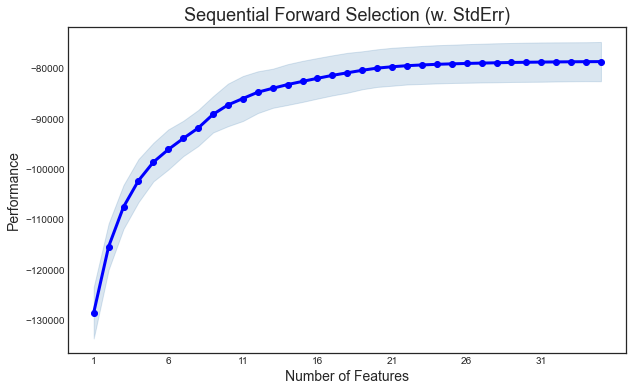

In [11]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
ticks = np.arange(1, 35, 5)
plt.xticks(ticks)
plt.show()

In [12]:
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

In [13]:
x_train = pd.DataFrame(x_train_sfs)

In [14]:
x_test = pd.DataFrame(x_test_sfs)

In [15]:
x_train.shape

(22674, 35)

In [16]:
x_test.shape

(23152, 35)

## Data Visualization

In [ ]:
fig, ax = plt.subplots(figsize=[10, 30])
bp.boxplot(
    data=,
    y='Country',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

# 3 Model implementation
## 3.1 Replicate the original paper(Peru): OLS

In [ ]:
# linear regression with constant
linreg = LinearRegression()
model1 = linreg.fit(x_train_withcons,y_train)

In [ ]:
model1.coef_

In [ ]:
ols_estimate_y = model1.predict(x_train_withcons)
ols_estimate_y

In [ ]:
ols_pred_y = model1.predict(x_test_withcons)

In [ ]:
x_train_withcons.shape

In [ ]:
# Linear regression by using Stata Model
x = sm.add_constant(x_train)
model2=sm.OLS(y1_train,x)
results=model2.fit()
results.summary().tables[1]


## x debug

In [ ]:
# Table 3.3 (1)
est = sm.OLS.from_formula('percapitaconsumption ~ d_h_educ_pre', train).fit()
est.summary().tables[1]

## Calculate MSE

In [ ]:
#calculate MSE for the training dataset (from the estimation of original paper)
from sklearn import metrics

metrics.mean_squared_error(train.lncaphat_OLS,train.lnpercapitaconsumption)

In [ ]:
metrics.mean_squared_error(train.percapitahat_OLS,train.percapitaconsumption)

In [ ]:
#calculate MSE for the training dataset (my calculation)
metrics.mean_squared_error(ols_estimatey,y1_train)

In [ ]:
metrics.mean_squared_error(ols_estimatey1111, y1_test)

## Model - Ridge

In [ ]:
ridge = RidgeCV(alphas=[0.1,0.3,0.5,0.7,0.9,1])
ridge.fit(x_train,y1_train)
train_ridge_pred = ridge.predict(x_train)

In [ ]:
ridge.alpha_

In [ ]:
metrics.mean_squared_error(train_ridge_pred,y1_train)

In [ ]:
ridge_pred_y = ridge.predict(x_test)

In [ ]:
metrics.mean_squared_error(ridge_pred_y,y1_test)

## Model - Lasso

In [17]:
lassocv = LassoCV(alphas = [0.1,0.3,0.5,0.7,0.9,1])
lassocv.fit(x_train, y_train)

LassoCV(alphas=[0.1, 0.3, 0.5, 0.7, 0.9, 1])

In [18]:
lassocv.alpha_

0.1

In [19]:
lasso_pred_y = lassocv.predict(x_test)

In [20]:
metrics.mean_squared_error(lasso_pred_y,y_test)

89109.93035176917

In [ ]:
ln_lassocv = LassoCV(alphas = [0.1,0.3,0.5,0.7,0.9,1])
ln_lassocv.fit(x_train, lny_train)

In [ ]:
ln_lassocv.alpha_

In [ ]:
ln_lasso_pred_y = ln_lassocv.predict(x_test)

In [ ]:
metrics.mean_squared_error(ln_lasso_pred_y,lny_train)

In [ ]:
ln_lasso_pred_y = ln_lassocv.predict(x_test)

In [ ]:
metrics.mean_squared_error(ln_lasso_pred_y,y2_test)

## 3.2 Model-KNN Regression
Not sure if it is a suitable algorithm for our dataset since all the features are dummies, and it is hard to define/calculate the "distance".
But we will see...

In [ ]:
# 调参时再用这块代码 跑很久
# create a knn regression model
knr = KNeighborsRegressor(weights = 'distance')
# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}
# use gridsearch to test all values for n_neighbors
knr_gscv = GridSearchCV(knr, param_grid, cv=10)
# fit model to data
knr_gscv.fit(x_train, y1_train)
#check top performing n_neighbors value: 33
knr_gscv.best_params_
# Prediction for x_train
train_knr_gscv = knr_gscv.predict(x_train)
# Calculate MSE from the prediction for x_train and original paper
metrics.mean_squared_error(train_knr_gscv, train.percapitaconsumption)

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 33, weights = 'distance')
knr.fit(x_train, y_train)
train_knr_pred = knr.predict(x_train)
metrics.mean_squared_error(train_knr_pred, y_train)

In [ ]:
knr_pred_y = knr.predict(x_test)

In [ ]:
metrics.mean_squared_error(knr_pred_y, y_test)

## 3.3 SVM Regression (SVR)

params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','poly','rbf','sigmoid']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
svr_gscv.fit(x_train,y1_train)

In [ ]:
params_dict={'C':[0.001,0.1,1,100],'gamma':[0.001,0.1,1,100],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y1_train)
svr_gscv.best_params_

In [ ]:
params_dict={'C':[100],'gamma':[0.1],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y1_train)
svr_gscv.best_params_

In [ ]:
train_svr_pred = svr_gscv.predict(x_train)

In [ ]:
metrics.mean_squared_error(train_svr_pred,y1_train)

In [ ]:
# predict for x_test
svr_pred_y = svr_gscv.predict(x_test)

In [ ]:
# calculate MSE from the prediction for x_test and y_test
metrics.mean_squared_error(svr_pred_y, y1_test)

In [ ]:
# tune the svr model
params_dict={'C':[300,400, 500],'gamma':[0.11, 0.12, 0.13],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y_train)
svr_gscv.best_params_


In [ ]:
svr_pred_y1 = svr_gscv.predict(x_test)
metrics.mean_squared_error(svr_pred_y1, y1_test)

In [ ]:
svr_try = SVR(C= 400, gamma=0.11, kernel='rbf')

In [ ]:
svr_try.fit(x_train, y_train)

In [ ]:
svr_pred_y = svr_try.predict(x_test)

In [ ]:
metrics.mean_squared_error(svr_pred_y, y_test)

## LightGBM

In [ ]:
x_train.shape

In [ ]:
for c in x_train.columns:
    col_type = x_train[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        x_train[c] = x_train[c].astype('category')

In [ ]:
x_try = x_train.iloc[0:22673,]

In [ ]:
x_try.shape

In [ ]:
y_try = y_train.iloc[0:22673,]

In [ ]:
y_try_com = y_train.iloc[0:22673,]/1000

In [ ]:
params_dict={'num_leaves':[5, 10, 15, 20, 25, 31],'n_estimators':[20, 40, 60, 80, 100],'learning_rate':[0.1, 0.3, 0.5, 0.7]}
lgbm_gscv=GridSearchCV(estimator=LGBMRegressor(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
lgbm_gscv.fit(x_try, y_try)
lgbm_gscv.best_params_

In [ ]:
lgbm_pred_y = lgbm_gscv.predict(x_test)

In [ ]:
metrics.mean_squared_error(lgbm_pred_y, y_test)

In [ ]:
lgbm_try = LGBMRegressor(num_leaves = 31, n_estimators = 30, learning_rate = 0.2)
# num_leaves = 31, n_estimators = 30, learning_rate = 0.2 MSE 82267.22790939707
# num_leaves = 31, n_estimators = 50, learning_rate = 0.2 MSE 82041.03707086027

In [ ]:
lgbm = LGBMRegressor(num_leaves = 31, n_estimators = 50, learning_rate = 0.2)

In [ ]:
lgbm.fit(x_try, y_try)

In [ ]:
lgbm_pred_y = lgbm.predict(x_test)

In [ ]:
metrics.mean_squared_error(lgbm_pred_y, y_test)

In [ ]:
lgbm = LGBMRegressor(num_leaves = 31, n_estimators = 50, learning_rate = 0.2)
lgbm.fit(x_try, y_try_com)
lgbm_pred_y = lgbm.predict(x_test)

In [ ]:
metrics.mean_squared_error(lgbm_pred_y, y_test_com)

In [ ]:
lgbm = LGBMRegressor(num_leaves = 31, n_estimators = 50, learning_rate = 0.25)

## GBDT

In [ ]:
gbm0 = GradientBoostingRegressor(random_state=10)
gbm0.fit(x_train,y_train)

In [ ]:
gbm0_pred_y = gbm0.predict(x_test)

In [ ]:
metrics.mean_squared_error(gbm0_pred_y, y_test)

## Neural Network

In [ ]:
params_dict = {'hidden_layer_sizes':[100,500,900], 'activation':['relu']}
nn_gscv = GridSearchCV(MLPRegressor(), param_grid=params_dict, cv=5, n_jobs=4, scoring='neg_mean_squared_error')

## 3.2 replicate the original figure 5 : OLS estimate